This is a simple Tensorflow model based on the MNIST dataset of handwritten digits. Partially based on this tutorial: https://www.tensorflow.org/tutorials/keras/classification

In [83]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)
print("GPU(s) recognized: ", len(tf.config.list_physical_devices('GPU')) != 0)


2.9.1
GPU(s) recognized:  False


In [51]:
#load in MNIST dataset directly from Tensorflow

mnist = tf.keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()



In [52]:
#Make data appropriate (normalize)
train_images = train_images / 255.0

test_images = test_images / 255.0

print(train_images.shape)
#Notice that the shape of the dataset's train images. There are 60000 examples, of which each is 28x28 pixels.

(60000, 28, 28)


In [76]:
#Make the model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), #make input data one dimensional array instead of 28x28
    tf.keras.layers.Dense(128, activation="sigmoid"), #makes 128 nodes in this layer
    tf.keras.layers.Dense(10) #last layer. Returns a logits array with ten nodes. Each node has the confidence. There are ten because there are ten labels.
])

In [77]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              #configures the model by setting the optimizer, loss function and metrics

In [78]:
model.fit(train_images, train_labels, epochs=10) #start training model by fitting train_images to train_labels
#Reaches accuracy of 99% when using sigmoid

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3921 - accuracy: 0.8974
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1942 - accuracy: 0.9438
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1424 - accuracy: 0.9589
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1116 - accuracy: 0.9684
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0896 - accuracy: 0.9746
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0741 - accuracy: 0.9793
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0614 - accuracy: 0.9829
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0516 - accuracy: 0.9855
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0435 - accuracy: 0.9885
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.037

In [79]:
#See accuracy of model by comparing with test dataset
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.0775 - accuracy: 0.9752 - 647ms/epoch - 2ms/step

Test accuracy: 0.9751999974250793


In [80]:
#Use softmax to make confidence to probability
prop = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

predictions = prop.predict(test_images)

313/313 [==============================] - 1s 2ms/step


8


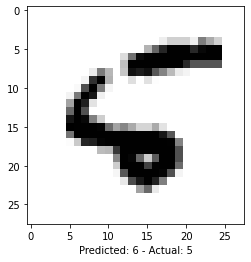

115


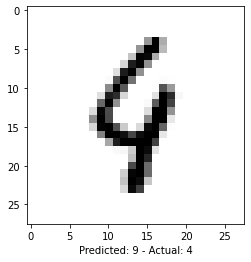

247


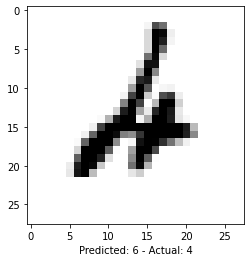

259


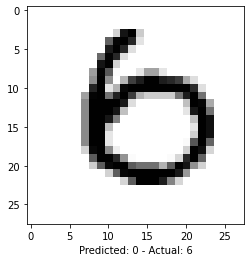

321


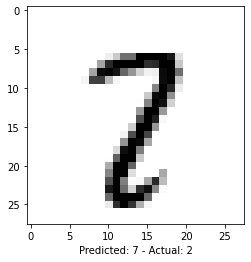

340


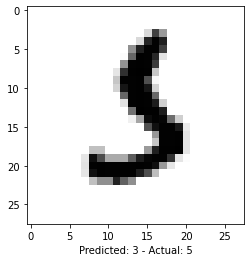

381


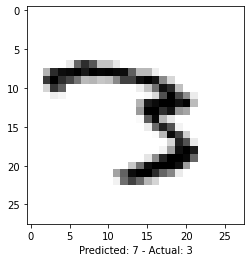

445


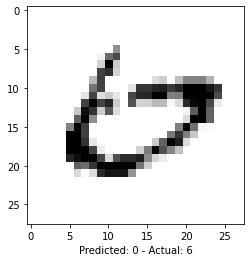

478


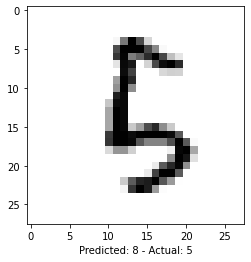

495


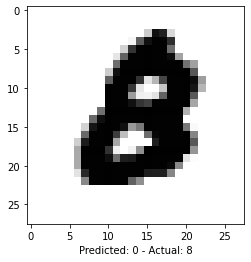

578


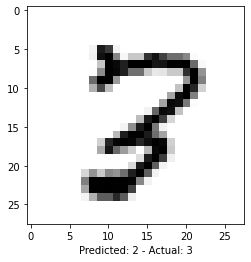

582


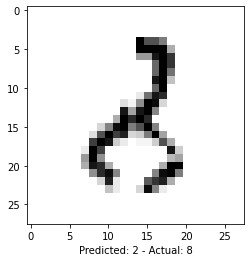

613


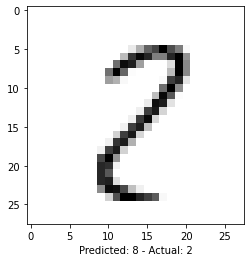

619


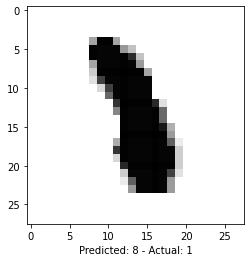

659


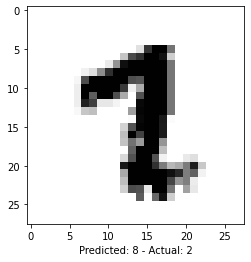

684


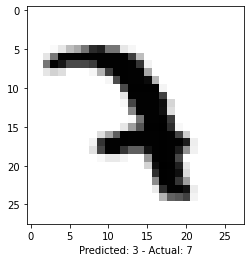

691


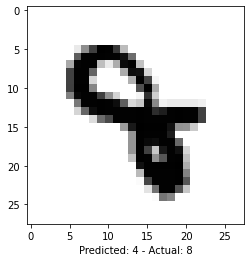

707


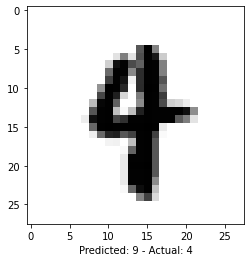

720


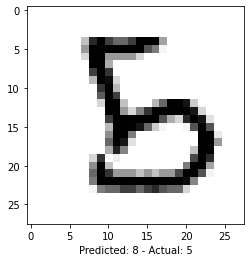

813


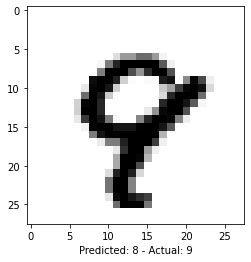

844


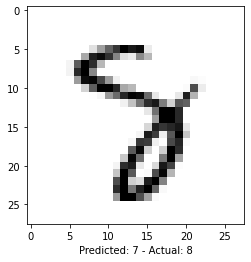

882


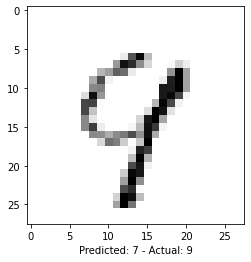

924


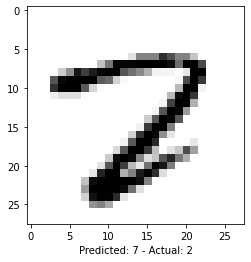

947


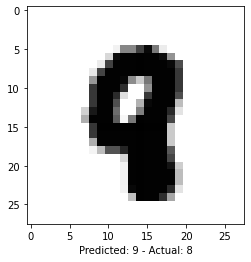

951


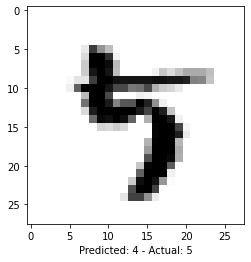

956


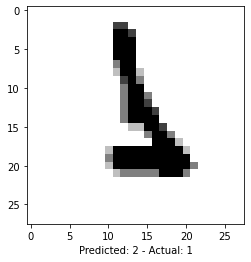

965


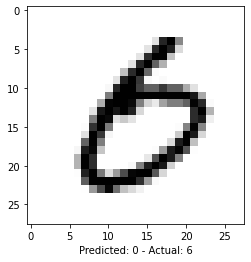

1014


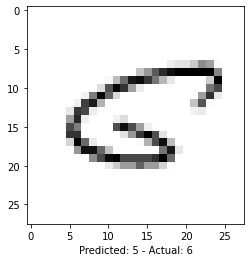

1032


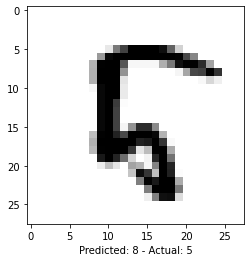

1044


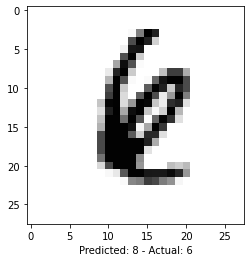

1107


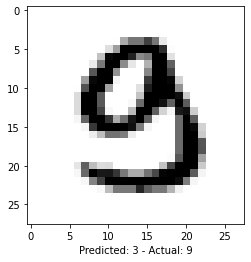

1112


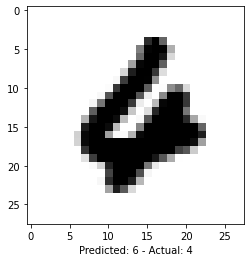

1114


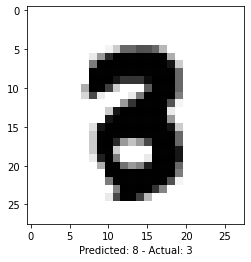

1156


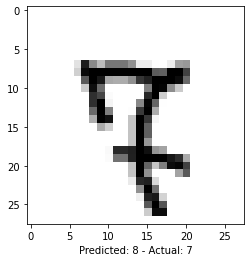

1166


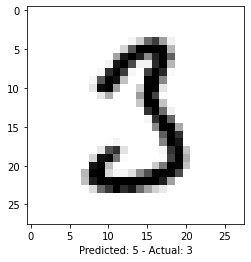

1181


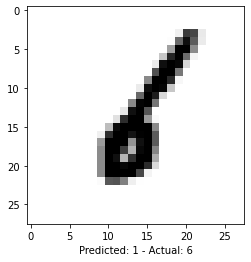

1182


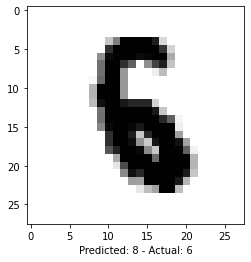

1194


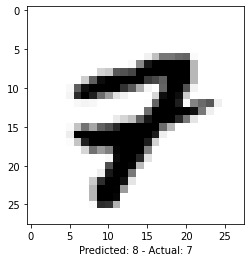

1226


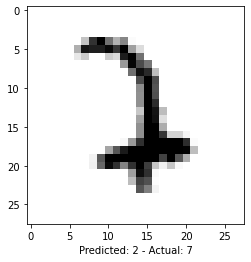

1232


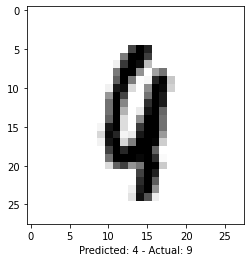

1242


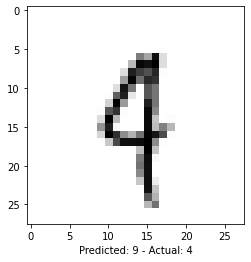

1247


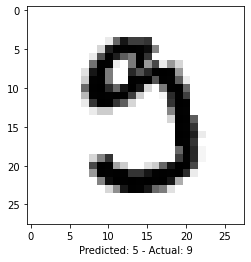

1299


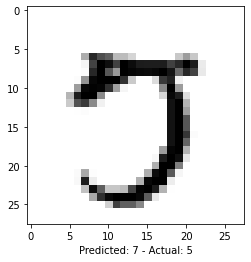

1319


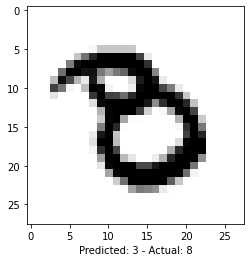

1325


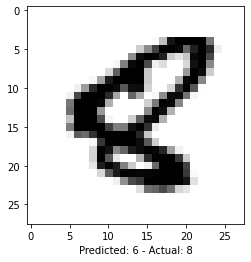

1326


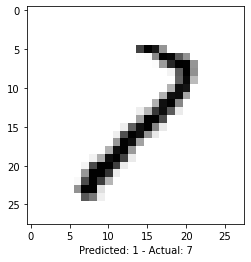

1364


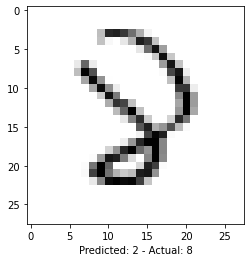

1378


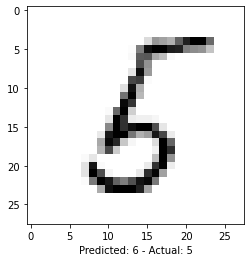

1393


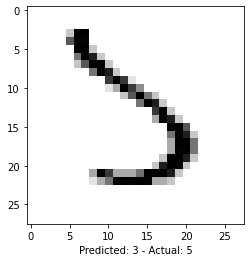

1500


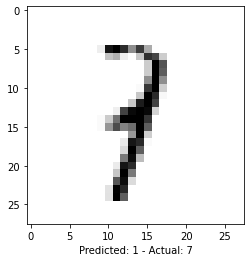

1522


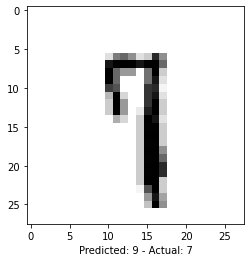

1527


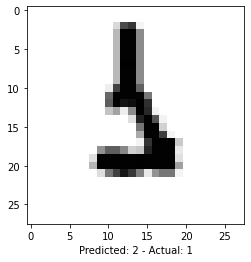

1530


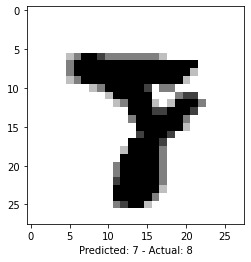

1549


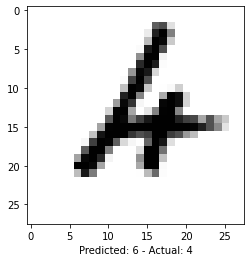

1553


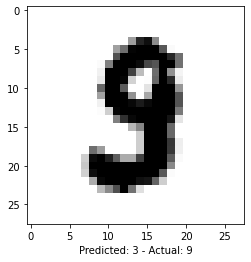

1609


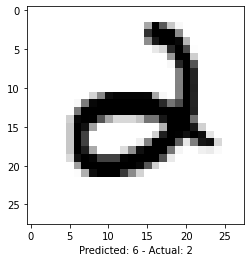

1678


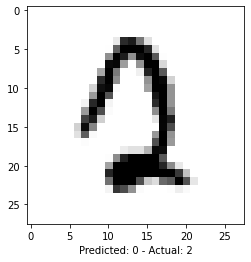

1681


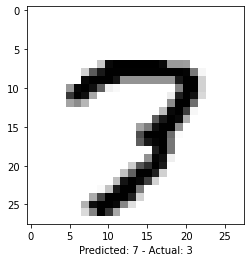

1709


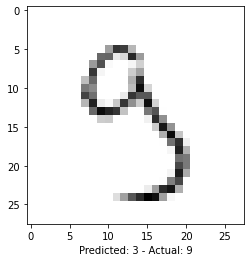

1717


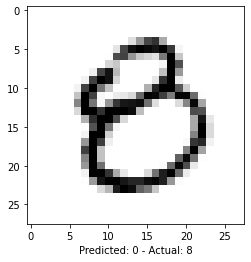

1754


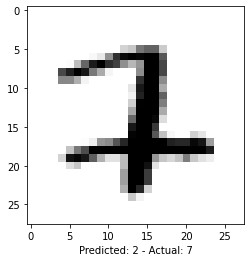

1790


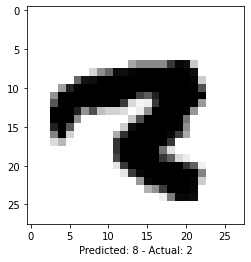

1828


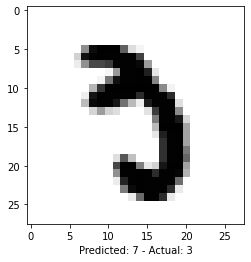

1878


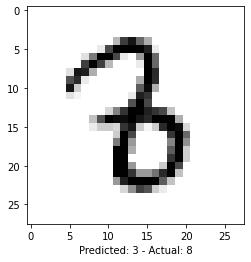

1901


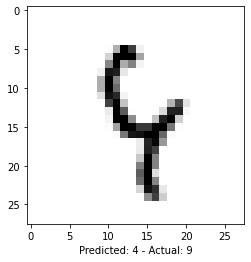

1941


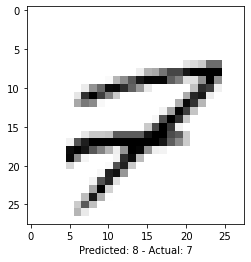

1952


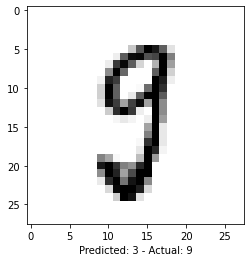

1982


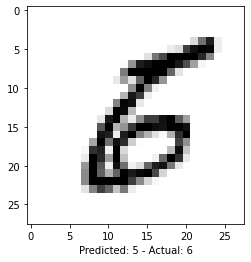

1984


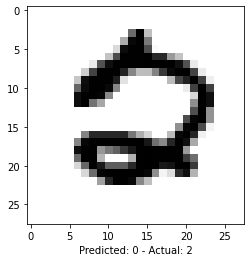

In [85]:
#Show examples where model was wrong just because it's fun
for i in range(2000):
    # #argmax takes the entry to the array with the highest value; the one the model is most confident in
    if(np.argmax(predictions[i]) != test_labels[i]):
        print(i)
        plt.figure()
        plt.imshow(test_images[i], cmap=plt.cm.binary)
        plt.grid(False)
        plt.xlabel(f"Predicted: {np.argmax(predictions[i])} - Actual: {test_labels[i]}")
        plt.show()